Patryk Łyczko <br>
406785 <br>
EAIiIB <br>

#### Zadanie 1

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import cv2

In [78]:
graph = np.array([[0,2,1,4,3,0,0,5,0,0],#1
                    [2,0,0,3,0,0,5,0,0,0],#2
                    [1,0,0,7,1,2,3,0,3,0],#3
                    [4,3,7,0,0,4,4,3,1,0],#4
                    [3,0,1,0,0,3,0,0,7,0],#5
                    [0,0,2,4,3,0,3,0,0,1],#6
                    [0,0,0,4,0,3,0,2,0,0],#7
                    [5,0,0,3,0,0,2,0,0,2],#8
                    [0,0,3,1,7,0,0,0,0,1],#9
                    [0,0,0,0,0,1,0,2,1,0]])#10

In [79]:
def near_neigh(graph,start):
    vert = np.array([i for i in range(graph.shape[0])])
    # print(vert)
    cost = 0
    path = {}
    vistited = []
    vert_looked = start
    vistited.append(start)
    next_vert = -1

    while (len(vistited) != graph.shape[0]):
        min_val = np.inf
        for i in vert:
            if i not in vistited:
                # print(i)
                if graph[vert_looked][i] < min_val and graph[vert_looked][i] != 0:
                    min_val = graph[vert_looked][i]
                    next_vert = i
        path[vert_looked + 1] = next_vert + 1
        cost += graph[vert_looked][next_vert]
        # print(cost)
        vert_looked = next_vert
        vistited.append(next_vert)
        # print(vistited)

    # print(vistited[-1])
    if graph[vistited[-1]][start] != 0:
        path[vistited[-1] + 1] = start + 1
        cost += graph[vistited[-1]][start]
        return path, cost
    else:
        return {}
    # print(path)
    


In [80]:

def find_best_trace(graph):
    vertx = np.array([i + 1 for i in range(10)])
    acc = 0
    while True:
        if acc > 9:
            break
        valx = near_neigh(graph,acc)
        val = valx[0]
        acc += 1
        arr = []
        for a,b in val.items():
            if a in arr:
                pass
            else:
                arr.append(a)
            if b in arr:
                pass
            else:
                arr.append(b)
        arr.sort()
        if np.array_equal(arr, vertx):
            return valx
    
 
        

23


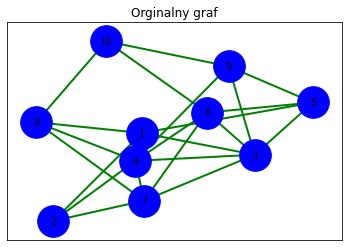

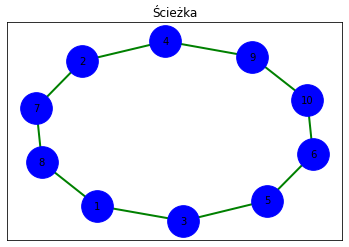

In [81]:
s1,s2 = graph.shape
connections = []

for i in range(s1):
    for j in range(s2):
        if graph[i][j] != 0:
            connections.append((i + 1,j + 1))

val, sum = find_best_trace(graph)
print(sum)
connections_v2 = []
for i,j in val.items():
    connections_v2.append((i,j))


Graph = nx.Graph()
nodes = range(1,11)
Graph.add_nodes_from(nodes)
Graph.add_edges_from(connections)

fig = plt.figure()
pos = nx.spring_layout(Graph)
plt.title("Orginalny graf")
nx.draw_networkx_nodes(Graph,pos,node_color='b', node_size=1000)
nx.draw_networkx_edges(Graph, pos, width=2,alpha=1, edge_color='g')
labels = {i:str(i) for i in range(1,11)}
nx.draw_networkx_labels(Graph,pos,labels=labels, font_size=10)
plt.show()


Graph = nx.Graph()
nodes = range(1,11)
Graph.add_nodes_from(nodes)
Graph.add_edges_from(connections_v2)

fig = plt.figure()
pos = nx.spring_layout(Graph)
plt.title("Ścieżka")
nx.draw_networkx_nodes(Graph,pos,node_color='b', node_size=1000)
nx.draw_networkx_edges(Graph, pos, width=2,alpha=1, edge_color='g')
labels = {i:str(i) for i in range(1,11)}
nx.draw_networkx_labels(Graph,pos,labels=labels, font_size=10)
plt.show()
